# Data Analysis of Youtube Comments Data
***
In the era of digital media, YouTube has emerged as one of the most influential platforms, hosting a vast repository of user-generated content and fostering a vibrant community of creators and viewers. Within this ecosystem, YouTube comments play a pivotal role in facilitating engagement, feedback, and discussion around videos. Understanding the sentiments, trends, and insights hidden within these comments can provide valuable information to content creators, marketers, and researchers alike.

This data analysis project focuses on harnessing the power of YouTube comments data to gain meaningful insights into user behavior, sentiment analysis, and content performance. By collecting and analyzing a diverse range of comments across various video categories, this project aims to answer key questions such as:

**- Sentiment Analysis** <br> 
**- Wordcloud Analysis** <br> 
**- Category Analysis** <br> 
**- Trending Video Analysis** <br> 
**- Punctuation Analysis** <br> 
***

## 0. Data Preparation:
***
Prior to delving into the analysis, it's essential to undertake data preparation to ensure the data is clean and devoid of errors.
***
#### - Import 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as pl
import textblob
from textblob import TextBlob as tb
from wordcloud import WordCloud as wc
from wordcloud import STOPWORDS
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot

In [68]:
cd E:\self-study\data analysis\youtube da\Youtube_project

E:\self-study\data analysis\youtube da\Youtube_project


#### - Read and Prepare the Data

In [69]:
comments = pd.read_csv("./UScomments.csv", on_bad_lines='skip')
comments.head()
comments.dropna(inplace=True)
comments.isnull().sum()

C:\Users\Zehao Zhu\AppData\Local\Temp\ipykernel_13968\2536074787.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [70]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [71]:
comments.shape

(691374, 4)

In [72]:
sampled_comments = comments.sample(n=1000)

***
## 1. Sentiment Analysis

Sentiment analysis, a natural language processing method, entails discerning the emotional disposition conveyed in text, encompassing positive, negative, or neutral sentiments. 
The polarity is computed from the comment text and is represented numerically on a scale from -1 to 1, signifying negative, neutral, and positive sentiments.
***

In [73]:
polarity = []
for i in range(len(comments)):
    try:
        polarity.append(tb(comments.iloc[i, 1]).sentiment.polarity)
    except:
         polarity.append(0)


In [74]:
comments["polarity"] = polarity

In [75]:
comments[5:10]

,video_id,comment_text,likes,replies,polarity
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


***
## 2. Wordcloud Analysis
Word cloud analysis is a method of data visualization that visually portrays the prevalence or significance of words within a dataset, often applied to textual data. This technique creates a visual representation wherein the size of each word reflects its frequency, facilitating the rapid identification of prominent terms or themes in the text. In our dataset, words are visualized based on their frequency or significance, categorized into positive, neutral, and negative groups.
***

In [107]:
positive = comments["polarity"] > 0.5
neutral = (comments["polarity"] >= -0.25) & (comments["polarity"]<= 0.25)
negative = comments["polarity"] < -0.5
positive_comments = comments["comment_text"][positive]
neutral_comments = comments["comment_text"][neutral]
negative_comments = comments["comment_text"][negative]

(-0.5, 399.5, 199.5, -0.5)

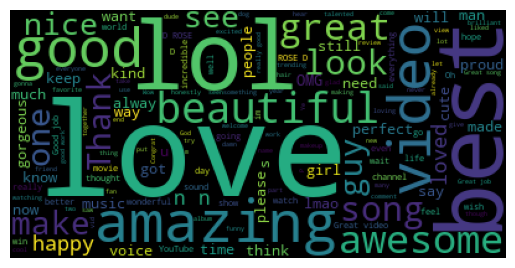

In [108]:
positive_wc = wc(stopwords=set(STOPWORDS)).generate(" ".join(positive_comments))
plt.imshow(positive_wc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

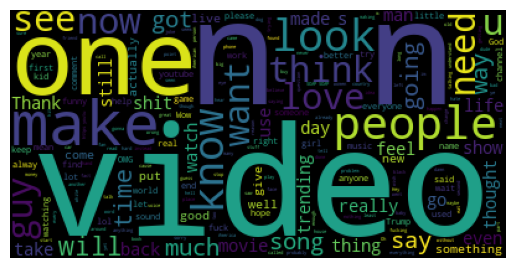

In [109]:
neutral_wc = wc(stopwords=set(STOPWORDS)).generate(" ".join(neutral_comments))
plt.imshow(neutral_wc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

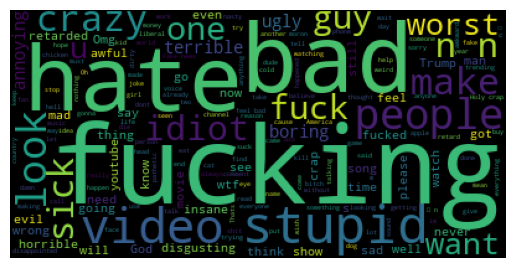

In [110]:
negative_wc = wc(stopwords=set(STOPWORDS)).generate(" ".join(negative_comments))
plt.imshow(negative_wc)
plt.axis("off")

***
## Emoji Analysis
Emoji frequency analysis is the process of quantifying and examining the occurrence of emojis within a dataset. It aims to identify which emojis are used most frequently, providing insights into the emotional expressions, sentiments, or themes prevalent in the analyzed content.
***

In [79]:
all_emojis = [char for comment in comments.iloc[:, 1] for char in comment if char in emoji.EMOJI_DATA]

In [80]:
most_common_emojis = Counter(all_emojis).most_common(10)

In [81]:
emoji_labels = [e[0] for e in most_common_emojis]
freq = [e[1] for e in most_common_emojis]

In [82]:
plot = go.Bar(x=emoji_labels, y = freq) #x is the labels of emojis, y is the frequencies
iplot([plot])